# Field `Valid`

The `discretisedfield.Field` class features a `valid` property, specifically designed to indicate which values within a field should be considered during specific operations and which ones should be disregarded. While not all functions recognize the `valid` property, it plays a pivotal role in tasks such as plotting and differentiation.

In this tutorial, we will delve into the various methods to set the `valid` property and shed light on its applications. To illustrate its functionality, we will create a scalar field on a 2D mesh and examine how `valid` operates within this context.

In [1]:
import numpy as np

import discretisedfield as df

mesh = df.Mesh(p1=(0, 0), p2=(2, 2), n=(2, 2))

When initializing our field, we can provide an argument named `valid`. By default, this argument is set to `True`, ensuring the field is valid everywhere.

In [2]:
field = df.Field(mesh, nvdim=1, value=1)
field.valid

array([[ True,  True],
       [ True,  True]])

We can also explicitly set the `valid` property using a boolean value, either `True` or `False`, to indicate the field's validity status.

In [3]:
field = df.Field(mesh, nvdim=1, value=1, valid=True)
field.valid

array([[ True,  True],
       [ True,  True]])

In fact, we can actually set `valid` using the exact same methods that we use to set the field values. For more information on ways this can be set please refer to the [spatially varying fields](https://ubermag.github.io/documentation/notebooks/discretisedfield/field-spatially-varying.html) notebook.

Let us try to set valid with a multidimensional list.

In [4]:
valid = [[True, True], [True, False]]
field_2 = df.Field(mesh, nvdim=1, value=1, valid=valid)
field_2.valid

array([[ True,  True],
       [ True, False]])

## Plotting
One of the functions that utilises `valid` is plotting. When plotting both fields we can see that any cell which has `valid=False` is masked.

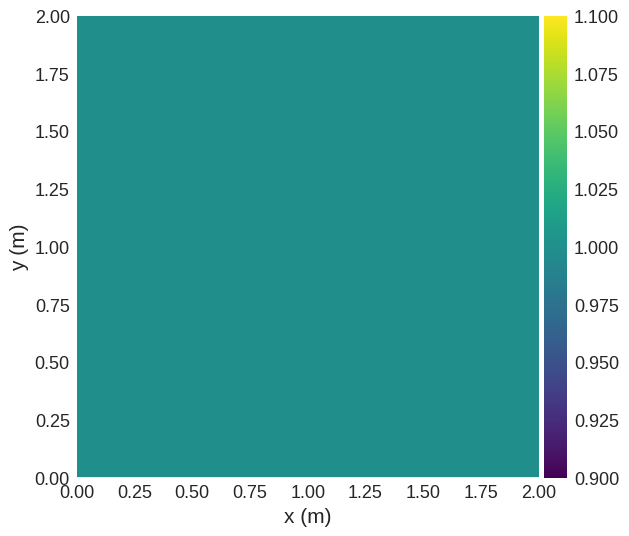

In [5]:
field.mpl()

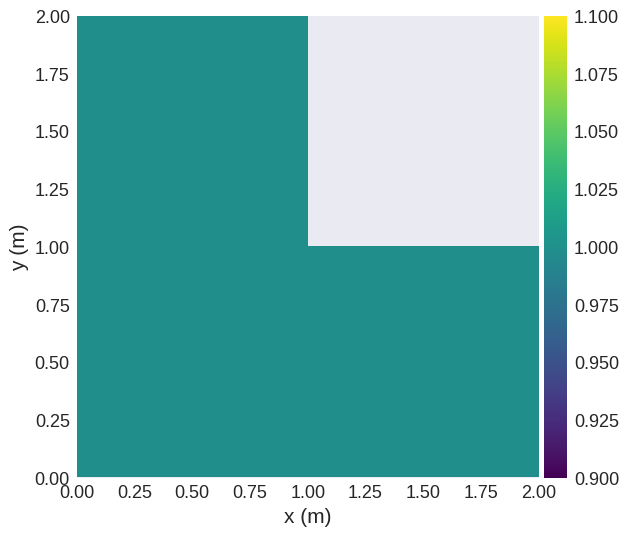

In [6]:
field_2.mpl()

Even after initialization, the `valid` property remains flexible, allowing for subsequent modifications.

In [7]:
field_2.valid = True
field_2.valid

array([[ True,  True],
       [ True,  True]])

Besides the conventional methods to set field values, the `valid` property can also automatically be set based on the norm of the field values. This can be achieved by passing `"norm"` to `valid`.

In [8]:
value = np.array([[[0, 1, 0], [0, 1, 1]], [[0, 1, -1], [0, 0, 0]]])
field_3 = df.Field(mesh, nvdim=3, value=value, valid="norm")
field_3.valid

array([[ True,  True],
       [ True, False]])

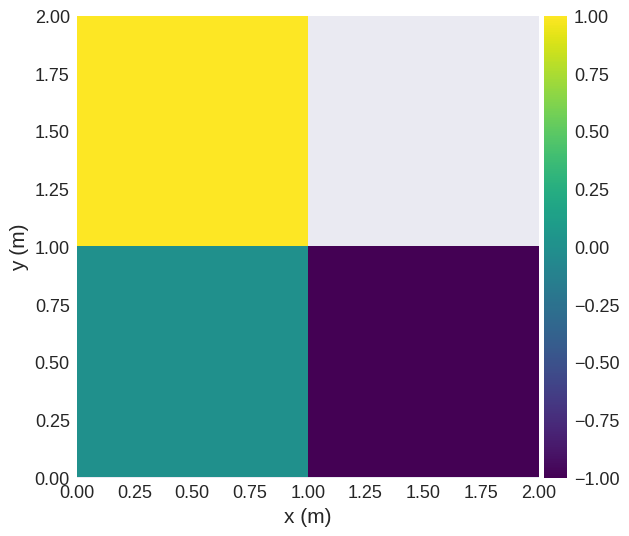

In [9]:
field_3.z.mpl()

## Operations
Operations can be performed between fields with different `valid` attributes but special attention must be given to ensure that the resulting field also accurately represents its validity.
When you perform an operation on these fields, the resulting `valid` attribute is determined by the logical AND operation on the `valid` attribute of the initial fields.
This is performed element-wise on the arrays.
Hence, for an element of the result to be `True`, both A and B must have valid attributes of `True`.

In [10]:
(field + field_3).valid

array([[ True,  True],
       [ True, False]])

The valid functionality is also used in other areas of discretisedfield such as differentiation.
However, it is not used in all operations - for example `fftn`.
Please refer to the API documentation for details on specific operations.